In [1]:
# To add plots to your Jupyter notebook, use the standard solution %matplotlib inline.
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# STEP 1: Split data set into 3 data frames: Urban, Suburban, Rural.
urban_data = pyber_data[pyber_data["type"] == "Urban"]
suburban_data = pyber_data[pyber_data["type"] == "Suburban"]
rural_data = pyber_data[pyber_data["type"] == "Rural"]

# Obtain X and Y coordinates for each city type.
# Urban data: Calculate ride count (x), average fare (y), number of drivers (z).
x_urban = urban_data["ride_id"].count()
y_urban = urban_data["fare"].mean()
z_urban = urban_data["driver_count"].mean()

# Suburban data: Calculate ride count (x), average fare (y), number of drivers (z).
x_suburban = suburban_data["ride_id"].count()
y_suburban = suburban_data["fare"].mean()
z_suburban = suburban_data["driver_count"].mean()

# Rural data: Calculate ride count (x), average fare (y), number of drivers (z).
x_rural = rural_data["ride_id"].count()
y_rural = rural_data["fare"].mean()
z_rural = rural_data["driver_count"].mean()


In [3]:
# STEP 2: Grab only city and ride ID column data. Put it into a new data frame.
city_rideid_urban = urban_data[['city', 'ride_id']]

# Use a new data frame to get the ride count by city.
city_rideid_urban_grouped = city_rideid_urban.groupby('city')

# Use a visualization loop to test the data in groupby dataframe
for key, item in city_rideid_urban_grouped:
    print(city_rideid_urban_grouped.get_group(key), "\n\n")

             city        ride_id
164   Amandaburgh   906850928986
235   Amandaburgh  6573820412437
239   Amandaburgh  6455620849753
320   Amandaburgh  7279902884763
454   Amandaburgh  5528427024492
536   Amandaburgh  4400632718421
540   Amandaburgh  3701008274871
654   Amandaburgh  1995462170530
687   Amandaburgh  3513123734716
741   Amandaburgh  6222134922674
742   Amandaburgh  1901157522591
784   Amandaburgh  7550325158038
919   Amandaburgh  7836117055007
963   Amandaburgh  8581415267582
1155  Amandaburgh  3419454549176
1213  Amandaburgh  6330658179518
1268  Amandaburgh  9975084532253
1541  Amandaburgh  4296858665195 


             city        ride_id
68    Barajasview  8268107272481
94    Barajasview  4108452999906
188   Barajasview  2612169071005
233   Barajasview  7225827834994
482   Barajasview   937248382509
524   Barajasview  8098247711287
539   Barajasview  4628923040888
558   Barajasview  1801612492097
578   Barajasview  9437995336707
632   Barajasview  1829231979881
656   B

In [5]:
# STEP 3: Capture the final data set by using a specific groupby method (function) to perform the calculation needed.
# Count all ride IDs for each city 
x_urban = city_rideid_urban_grouped.count()['ride_id']
x_suburban = 
y_urban

KeyError: 'fare'

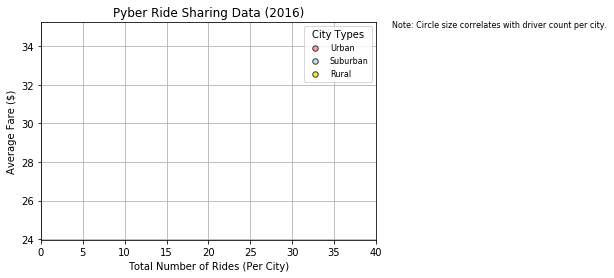

In [18]:
# Build the scatter plots for each city type.

plt.scatter(x_urban, y_urban, label = "Urban", s=z_urban * 10, color=["lightcoral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=z_suburban * 10, color=["lightblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=z_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim((0,40))

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize = 8)

# Save figure 
plt.savefig("fig1.png")

plt.show()

## Total Fares by City Type

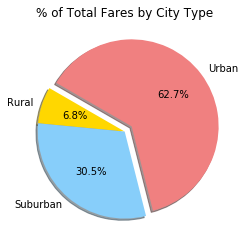

In [24]:
# Calculate Type Percents
type_percents = 100 * pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fig2.png")

plt.show()


## Total Rides by City Type

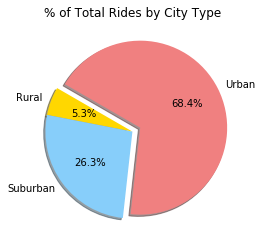

In [26]:
# Calculate Type Percents
type_percents = 100 * pyber_data.groupby(["type"]).count()["ride_id"] / pyber_data["ride_id"].count()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("fig3.png")

plt.show()


## Total Drivers by City Type

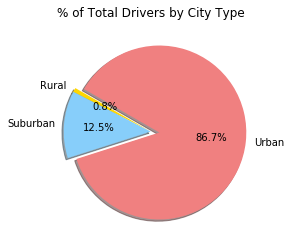

In [30]:
# Calculate Type Percents
type_percents = 100 * pyber_data.groupby(["type"]).sum()["driver_count"] / pyber_data["city"].count()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("fig4.png")

plt.show()


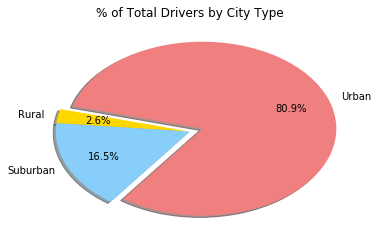

In [6]:
# Show Figure
plt.show()